<a href="https://colab.research.google.com/github/AhmadMugiar/Analisis-Kohort-Pelanggan-E-commerce/blob/main/Analisis_Cohort_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LOAD DATA

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt
import dateutil
from datetime import datetime as dt
from pytz import utc

In [5]:
#input data
df = pd.read_csv('/content/Electronic_sales_Sep2023-Sep2024.csv')
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


In [6]:
df

,Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
0,1000,53,Male,No,Smartphone,SKU1004,2,Cancelled,Credit Card,5538.33,791.19,7,2024-03-20,Standard,"Accessory,Accessory,Accessory",40.21
1,1000,53,Male,No,Tablet,SKU1002,3,Completed,Paypal,741.09,247.03,3,2024-04-20,Overnight,Impulse Item,26.09
2,1002,41,Male,No,Laptop,SKU1005,3,Completed,Credit Card,1855.84,463.96,4,2023-10-17,Express,NaN,0.00
3,1002,41,Male,Yes,Smartphone,SKU1004,2,Completed,Cash,3164.76,791.19,4,2024-08-09,Overnight,"Impulse Item,Impulse Item",60.16
4,1003,75,Male,Yes,Smartphone,SKU1001,5,Completed,Cash,41.50,20.75,2,2024-05-21,Express,Accessory,35.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,Female,No,Smartphone,SMP234,4,Completed,Bank Transfer,6838.08,1139.68,6,2024-06-15,Expedited,NaN,0.00
19996,19996,27,Female,Yes,Laptop,LTP123,4,Cancelled,Credit Card,2697.28,674.32,4,2024-07-18,Standard,NaN,0.00
19997,19996,27,Female,No,Headphones,HDP456,4,Completed,Bank Transfer,1805.90,361.18,5,2024-08-26,Standard,"Impulse Item, Extended Warranty, Accessory",198.98
19998,19997,27,Male,No,Headphones,HDP456,1,Cancelled,Bank Transfer,2528.26,361.18,7,2024-01-06,Expedited,"Extended Warranty, Accessory",101.34


In [7]:
df.isnull().sum()

,0
Customer ID,0
Age,0
Gender,1
Loyalty Member,0
Product Type,0
SKU,0
Rating,0
Order Status,0
Payment Method,0
Total Price,0


In [8]:
df = df.drop(columns=['Add-ons Purchased','Rating', 'SKU','Payment Method','Gender'])

In [9]:
df

,Customer ID,Age,Loyalty Member,Product Type,Order Status,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-on Total
0,1000,53,No,Smartphone,Cancelled,5538.33,791.19,7,2024-03-20,Standard,40.21
1,1000,53,No,Tablet,Completed,741.09,247.03,3,2024-04-20,Overnight,26.09
2,1002,41,No,Laptop,Completed,1855.84,463.96,4,2023-10-17,Express,0.00
3,1002,41,Yes,Smartphone,Completed,3164.76,791.19,4,2024-08-09,Overnight,60.16
4,1003,75,Yes,Smartphone,Completed,41.50,20.75,2,2024-05-21,Express,35.56
...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,No,Smartphone,Completed,6838.08,1139.68,6,2024-06-15,Expedited,0.00
19996,19996,27,Yes,Laptop,Cancelled,2697.28,674.32,4,2024-07-18,Standard,0.00
19997,19996,27,No,Headphones,Completed,1805.90,361.18,5,2024-08-26,Standard,198.98
19998,19997,27,No,Headphones,Cancelled,2528.26,361.18,7,2024-01-06,Expedited,101.34


#Retenitas Customer

In [10]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='ISO8601')
print(df[['Purchase Date', 'Purchase Date']].head())
print(df['Purchase Date'].dtype)

  Purchase Date Purchase Date
0    2024-03-20    2024-03-20
1    2024-04-20    2024-04-20
2    2023-10-17    2023-10-17
3    2024-08-09    2024-08-09
4    2024-05-21    2024-05-21
datetime64[ns]


In [11]:
df['datetime'] = df['Purchase Date'].apply(lambda x: x.timestamp())
df['month'] = df['datetime'].apply(lambda x: dt.fromtimestamp(x, utc).month)
df['year'] = df['datetime'].apply(lambda x: dt.fromtimestamp(x, utc).year)

In [12]:
df.head(8)

,Customer ID,Age,Loyalty Member,Product Type,Order Status,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-on Total,datetime,month,year
0,1000,53,No,Smartphone,Cancelled,5538.33,791.19,7,2024-03-20,Standard,40.21,1.710893e+09,3,2024
1,1000,53,No,Tablet,Completed,741.09,247.03,3,2024-04-20,Overnight,26.09,1.713571e+09,4,2024
2,1002,41,No,Laptop,Completed,1855.84,463.96,4,2023-10-17,Express,0.00,1.697501e+09,10,2023
3,1002,41,Yes,Smartphone,Completed,3164.76,791.19,4,2024-08-09,Overnight,60.16,1.723162e+09,8,2024
4,1003,75,Yes,Smartphone,Completed,41.50,20.75,2,2024-05-21,Express,35.56,1.716250e+09,5,2024
5,1004,41,No,Smartphone,Completed,83.00,20.75,4,2024-05-26,Standard,65.78,1.716682e+09,5,2024
6,1005,25,No,Smartwatch,Completed,7603.47,844.83,9,2024-01-30,Overnight,0.00,1.706573e+09,1,2024
7,1005,25,No,Laptop,Completed,4175.64,463.96,9,2024-06-24,Overnight,75.33,1.719187e+09,6,2024


In [13]:
df['cohort'] = df.apply(lambda row: (row['year'] * 100) + (row['month']), axis=1)

cohorts = df.groupby('Customer ID')['cohort'].min().reset_index()
cohorts.columns = ['Customer ID', 'first_cohort']

df = df.merge(cohorts, on='Customer ID', how='left')

In [14]:
cohorts

,Customer ID,first_cohort
0,1000,202403
1,1002,202310
2,1003,202405
3,1004,202405
4,1005,202401
...,...,...
12131,19994,202406
12132,19995,202408
12133,19996,202401
12134,19997,202401


In [15]:
headers = df['cohort'].value_counts().reset_index()
headers.columns = ['Cohorts', 'Count']
headers.head()
headers = headers.sort_values(['Cohorts'])['Cohorts'].to_list()

In [16]:
headers

[202309,
 202310,
 202311,
 202312,
 202401,
 202402,
 202403,
 202404,
 202405,
 202406,
 202407,
 202408,
 202409]

In [17]:
df.dropna(inplace=True)

In [18]:
df['cohort_distance'] = df.apply(lambda row: (headers.index(row['cohort']) - headers.index(row['first_cohort'])) if (row['first_cohort'] != 0 and row['cohort'] != 0) else np.nan, axis=1)

In [19]:
df

,Customer ID,Age,Loyalty Member,Product Type,Order Status,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-on Total,datetime,month,year,cohort,first_cohort,cohort_distance
0,1000,53,No,Smartphone,Cancelled,5538.33,791.19,7,2024-03-20,Standard,40.21,1.710893e+09,3,2024,202403,202403,0
1,1000,53,No,Tablet,Completed,741.09,247.03,3,2024-04-20,Overnight,26.09,1.713571e+09,4,2024,202404,202403,1
2,1002,41,No,Laptop,Completed,1855.84,463.96,4,2023-10-17,Express,0.00,1.697501e+09,10,2023,202310,202310,0
3,1002,41,Yes,Smartphone,Completed,3164.76,791.19,4,2024-08-09,Overnight,60.16,1.723162e+09,8,2024,202408,202310,10
4,1003,75,Yes,Smartphone,Completed,41.50,20.75,2,2024-05-21,Express,35.56,1.716250e+09,5,2024,202405,202405,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,27,No,Smartphone,Completed,6838.08,1139.68,6,2024-06-15,Expedited,0.00,1.718410e+09,6,2024,202406,202401,5
19996,19996,27,Yes,Laptop,Cancelled,2697.28,674.32,4,2024-07-18,Standard,0.00,1.721261e+09,7,2024,202407,202401,6
19997,19996,27,No,Headphones,Completed,1805.90,361.18,5,2024-08-26,Standard,198.98,1.724630e+09,8,2024,202408,202401,7
19998,19997,27,No,Headphones,Cancelled,2528.26,361.18,7,2024-01-06,Expedited,101.34,1.704499e+09,1,2024,202401,202401,0


In [20]:
cohort_pivot = pd.pivot_table(df,
                              index='first_cohort',
                              columns='cohort_distance',
                              values='Customer ID',
                              aggfunc=pd.Series.nunique)
cohort_pivot

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
first_cohort,,,,,,,,,,,,,
202309,185.0,19.0,19.0,18.0,19.0,19.0,16.0,13.0,24.0,12.0,20.0,13.0,19.0
202310,852.0,61.0,77.0,72.0,68.0,83.0,71.0,79.0,86.0,58.0,71.0,52.0,NaN
202311,686.0,54.0,63.0,47.0,64.0,54.0,55.0,59.0,56.0,60.0,48.0,NaN,NaN
202312,614.0,54.0,45.0,52.0,51.0,63.0,45.0,47.0,40.0,42.0,NaN,NaN,NaN
202401,1722.0,163.0,189.0,176.0,199.0,215.0,184.0,189.0,142.0,NaN,NaN,NaN,NaN
202402,1386.0,130.0,149.0,155.0,165.0,149.0,163.0,115.0,NaN,NaN,NaN,NaN,NaN
202403,1330.0,147.0,145.0,149.0,142.0,137.0,99.0,NaN,NaN,NaN,NaN,NaN,NaN
202404,1170.0,120.0,132.0,123.0,126.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202405,1097.0,106.0,129.0,104.0,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


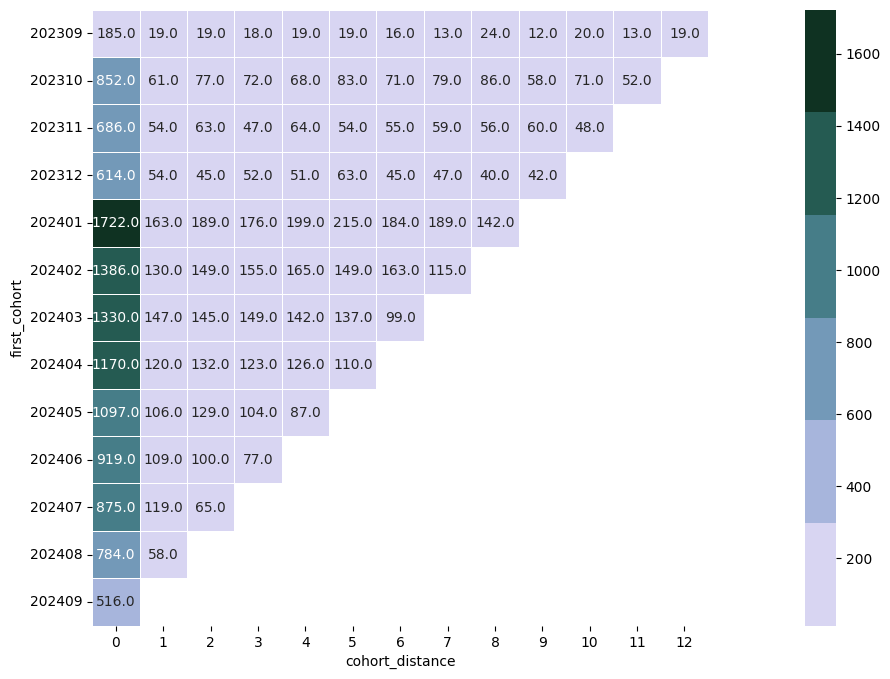

In [21]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(cohort_pivot, annot=True, fmt='', mask=cohort_pivot.isnull(), ax=ax, square=True, linewidths=.5, cmap=sns.cubehelix_palette(start=2))

plt.show()

#Persentase Jumlah Pelanggan Per Cohort

In [22]:
cohort_pivot_pers = cohort_pivot.div(cohort_pivot[0],axis=0)

In [23]:
cohort_pivot_pers

cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
first_cohort,,,,,,,,,,,,,
202309,1.0,0.102703,0.102703,0.097297,0.102703,0.102703,0.086486,0.070270,0.129730,0.064865,0.108108,0.070270,0.102703
202310,1.0,0.071596,0.090376,0.084507,0.079812,0.097418,0.083333,0.092723,0.100939,0.068075,0.083333,0.061033,NaN
202311,1.0,0.078717,0.091837,0.068513,0.093294,0.078717,0.080175,0.086006,0.081633,0.087464,0.069971,NaN,NaN
202312,1.0,0.087948,0.073290,0.084691,0.083062,0.102606,0.073290,0.076547,0.065147,0.068404,NaN,NaN,NaN
202401,1.0,0.094657,0.109756,0.102207,0.115563,0.124855,0.106852,0.109756,0.082462,NaN,NaN,NaN,NaN
202402,1.0,0.093795,0.107504,0.111833,0.119048,0.107504,0.117605,0.082973,NaN,NaN,NaN,NaN,NaN
202403,1.0,0.110526,0.109023,0.112030,0.106767,0.103008,0.074436,NaN,NaN,NaN,NaN,NaN,NaN
202404,1.0,0.102564,0.112821,0.105128,0.107692,0.094017,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202405,1.0,0.096627,0.117593,0.094804,0.079307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
cohort_size = cohort_pivot.iloc[:, 0]
cohort_size

,0
first_cohort,
202309,185.0
202310,852.0
202311,686.0
202312,614.0
202401,1722.0
202402,1386.0
202403,1330.0
202404,1170.0
202405,1097.0


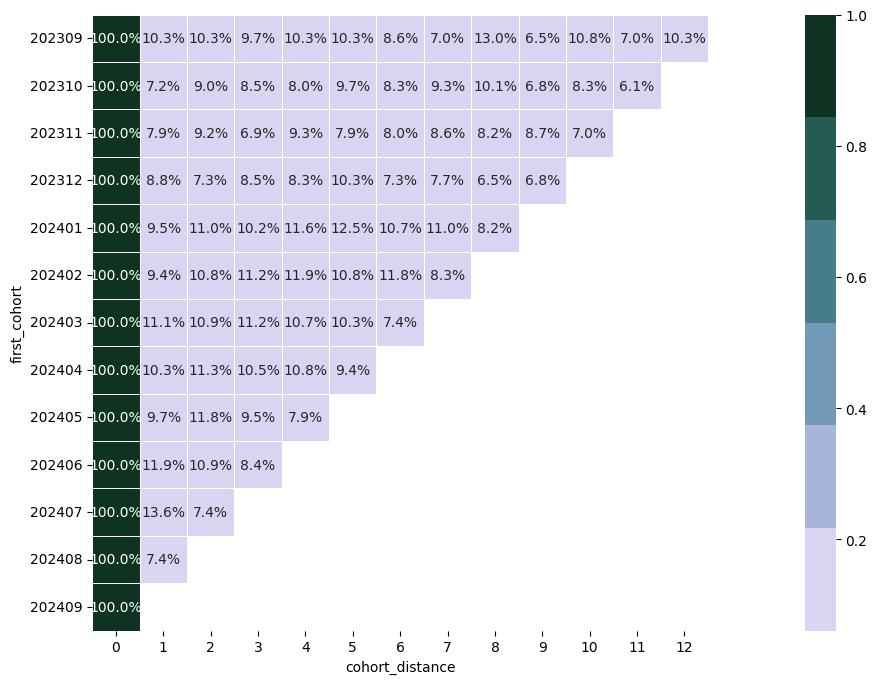

In [25]:
fig_dims = (25, 8)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(cohort_pivot_pers, annot=True, fmt='.1%', mask=cohort_pivot.isnull(), ax=ax, square=True, linewidths=.5, cmap=sns.cubehelix_palette(start=2))

plt.show()

#Rata Rata Masa Hidup Pelanggan ( Customer Lifetime )

In [26]:
last_transaction = df.groupby('Customer ID')['cohort'].max().reset_index()
last_transaction.columns = ['Customer ID', 'last_cohort']
customer_lifetime = pd.merge(last_transaction, cohorts, on='Customer ID', how='left')
def calculate_month_distance(cohort1, cohort2):
    year1 = cohort1 // 100
    month1 = cohort1 % 100
    year2 = cohort2 // 100
    month2 = cohort2 % 100
    return (year2 - year1) * 12 + (month2 - month1)
customer_lifetime['customer_lifetime_months'] = customer_lifetime.apply(lambda row: calculate_month_distance(row['first_cohort'], row['last_cohort']), axis=1)
average_lifetime_per_cohort = customer_lifetime.groupby('first_cohort')['customer_lifetime_months'].mean().reset_index()
average_lifetime_per_cohort.columns = ['first_cohort', 'average_lifetime_months']

print("\nRata-rata Masa Hidup Pelanggan per Kohort (dalam Bulan):")
print(average_lifetime_per_cohort)
df = pd.merge(df, customer_lifetime[['Customer ID', 'customer_lifetime_months']], on='Customer ID', how='left')


Rata-rata Masa Hidup Pelanggan per Kohort (dalam Bulan):
    first_cohort  average_lifetime_months
0         202309                 4.978378
1         202310                 4.193662
2         202311                 3.532070
3         202312                 2.747557
4         202401                 2.997677
5         202402                 2.364358
6         202403                 1.710526
7         202404                 1.352991
8         202405                 0.844120
9         202406                 0.546246
10        202407                 0.269714
11        202408                 0.073980
12        202409                 0.000000


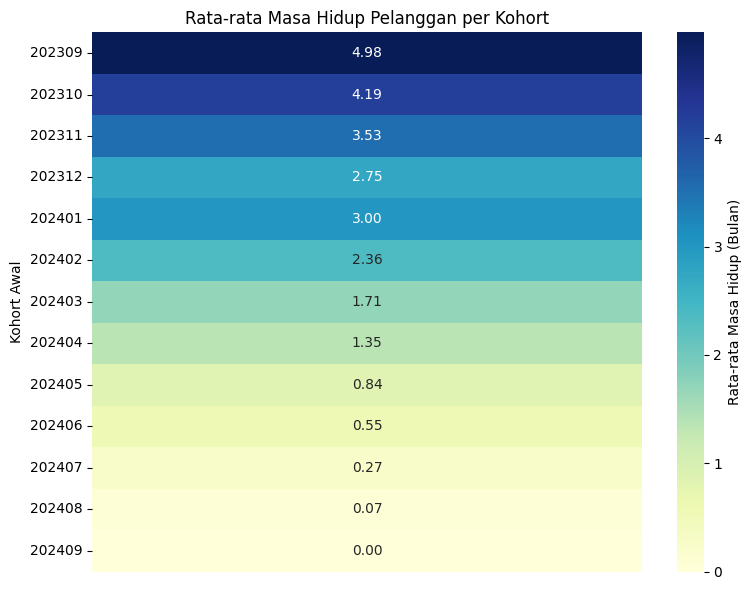

In [27]:
lifetime_pivot = average_lifetime_per_cohort.pivot_table(index='first_cohort', values='average_lifetime_months')

plt.figure(figsize=(8, 6))
sns.heatmap(lifetime_pivot, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Rata-rata Masa Hidup (Bulan)'})
plt.title('Rata-rata Masa Hidup Pelanggan per Kohort')
plt.ylabel('Kohort Awal')
plt.xticks([])
plt.tight_layout()
plt.show()

#Nilai Hidup Pelanggan (Customer Lifetime Value)

In [28]:
df['TotalPrice'] = df['Total Price']+df['Add-on Total']

In [29]:
cohort_revenue = df.groupby(['first_cohort', 'cohort_distance'])['TotalPrice'].sum().reset_index()

In [30]:
cohort_customers = df.groupby('first_cohort')['Customer ID'].nunique().reset_index()
cohort_customers.columns = ['first_cohort', 'TotalCustomers']

In [31]:
cohort_revenue = pd.merge(cohort_revenue, cohort_customers, on='first_cohort')

In [32]:
cohort_revenue['AvgRevenuePerCustomer'] = cohort_revenue['TotalPrice'] / cohort_revenue['TotalCustomers']

In [33]:
cohort_cltv = cohort_revenue.pivot_table(index='first_cohort',
                                        columns='cohort_distance',
                                        values='AvgRevenuePerCustomer')

print("\nRata-rata Nilai Hidup Pelanggan (CLTV) per Kohort per Bulan Kohort:")
cohort_cltv


Rata-rata Nilai Hidup Pelanggan (CLTV) per Kohort per Bulan Kohort:


cohort_distance,0,1,2,3,4,5,6,7,8,9,10,11,12
first_cohort,,,,,,,,,,,,,
202309,2648.510324,277.810703,260.725027,282.140757,244.121459,241.447189,162.421189,291.051514,358.535730,293.686811,312.764000,251.636973,303.156541
202310,2705.291655,185.864413,284.678345,237.698016,225.155270,212.261138,228.552641,266.892617,236.758392,155.119531,241.925810,175.481643,NaN
202311,2764.915948,190.944315,276.938455,145.433251,233.009971,218.297332,197.236910,270.798469,245.509650,251.285831,207.157522,NaN,NaN
202312,2587.100472,256.569593,174.994625,190.741873,251.432101,301.559088,217.945358,220.536189,179.645212,253.921336,NaN,NaN,NaN
202401,3577.916922,334.290732,428.801609,397.965093,439.110488,496.004576,351.532294,412.074350,295.710424,NaN,NaN,NaN,NaN
202402,3488.082547,361.574805,389.220960,446.591126,452.559113,409.304300,448.912460,309.958903,NaN,NaN,NaN,NaN,NaN
202403,3550.322023,422.586226,374.534669,375.701203,393.978023,401.384368,262.979030,NaN,NaN,NaN,NaN,NaN,NaN
202404,3592.075838,346.633385,445.451769,426.077752,389.012718,375.317744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
202405,3598.962890,350.713373,477.931650,323.572562,312.217630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


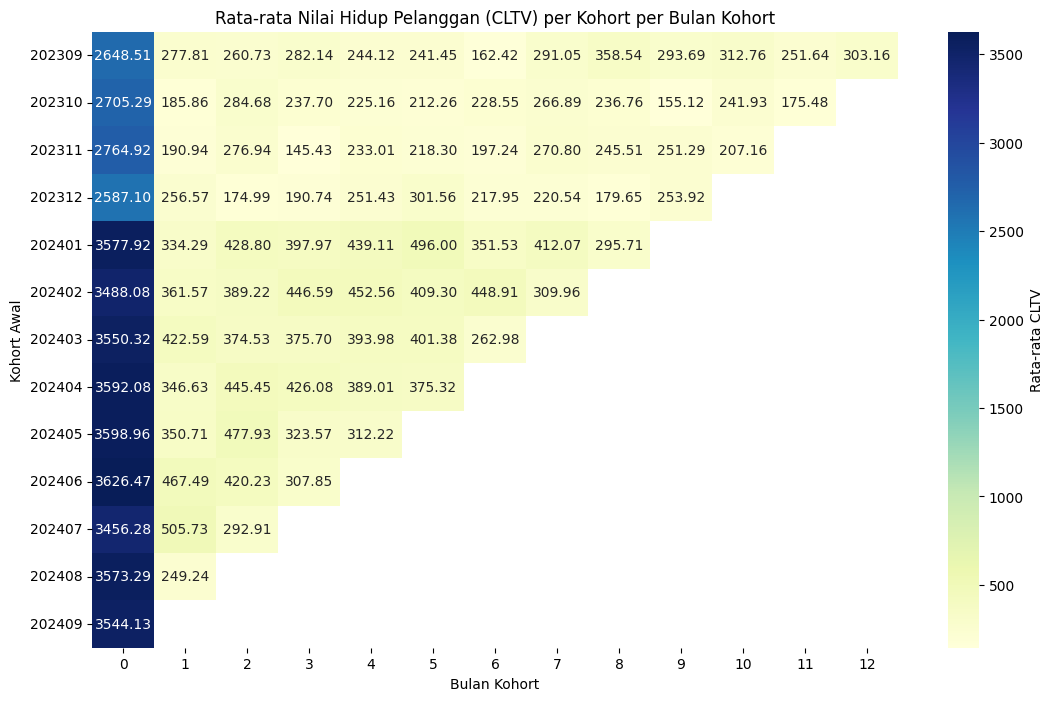

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 8))
sns.heatmap(cohort_cltv, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Rata-rata CLTV'}, mask=cohort_cltv.isnull())
plt.title('Rata-rata Nilai Hidup Pelanggan (CLTV) per Kohort per Bulan Kohort')
plt.xlabel('Bulan Kohort')
plt.ylabel('Kohort Awal')
plt.show()

#Churn Pelanggan

In [35]:
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])

In [36]:
df['year_month'] = df['Purchase Date'].dt.to_period('M').astype(str).str.replace('-', '').astype(int)

In [37]:
last_transaction = df.groupby('Customer ID')['year_month'].max().reset_index()
last_transaction.columns = ['Customer ID', 'last_month']

In [38]:
churn_df = cohorts.merge(last_transaction, on='Customer ID')

In [39]:
churn_df

,Customer ID,first_cohort,last_month
0,1000,202403,202404
1,1002,202310,202408
2,1003,202405,202405
3,1004,202405,202405
4,1005,202401,202406
...,...,...,...
12131,19994,202406,202406
12132,19995,202408,202408
12133,19996,202401,202408
12134,19997,202401,202401


In [40]:
churn_df['is_churned'] = churn_df['first_cohort'] == churn_df['last_month']

In [41]:
churn_df

,Customer ID,first_cohort,last_month,is_churned
0,1000,202403,202404,False
1,1002,202310,202408,False
2,1003,202405,202405,True
3,1004,202405,202405,True
4,1005,202401,202406,False
...,...,...,...,...
12131,19994,202406,202406,True
12132,19995,202408,202408,True
12133,19996,202401,202408,False
12134,19997,202401,202401,True


In [42]:
churn_stats = churn_df.groupby('first_cohort').agg(
    total_customers=('Customer ID', 'count'),
    churned_customers=('is_churned', 'sum')
).reset_index()

churn_stats['churn_rate'] = churn_stats['churned_customers'] / churn_stats['total_customers']
churn_stats

,first_cohort,total_customers,churned_customers,churn_rate
0,202309,185,60,0.324324
1,202310,852,314,0.368545
2,202311,686,288,0.419825
3,202312,614,298,0.485342
4,202401,1722,691,0.401278
5,202402,1386,642,0.463203
6,202403,1330,701,0.527068
7,202404,1170,668,0.570940
8,202405,1097,732,0.667274
9,202406,919,664,0.722524


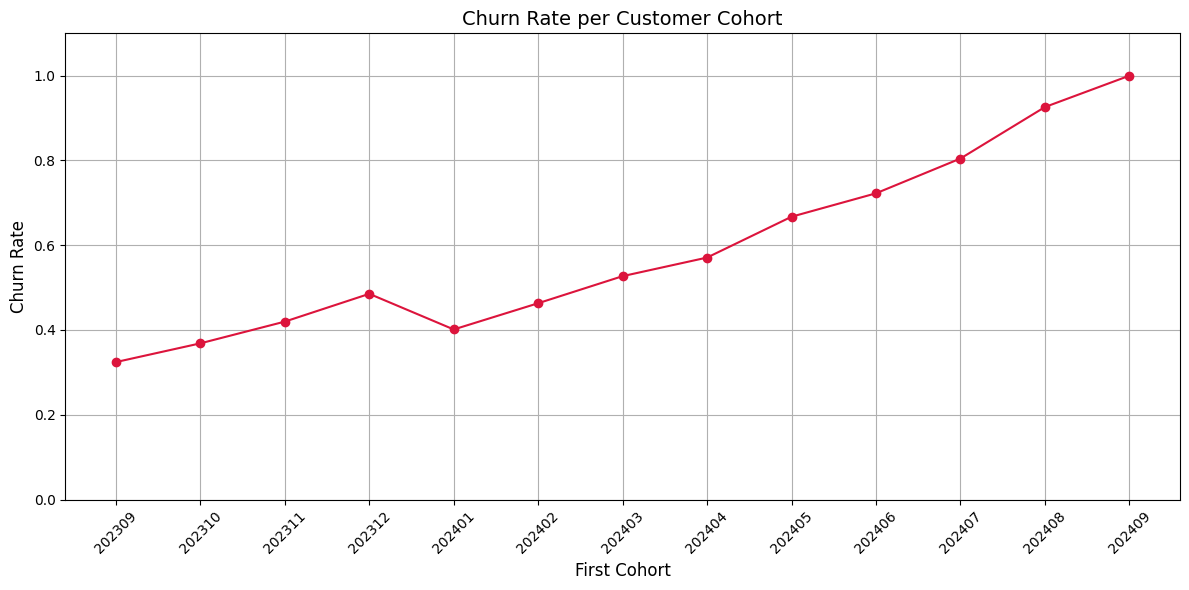

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(churn_stats['first_cohort'].astype(str), churn_stats['churn_rate'], marker='o', color='crimson')
plt.title('Churn Rate per Customer Cohort', fontsize=14)
plt.xlabel('First Cohort', fontsize=12)
plt.ylabel('Churn Rate', fontsize=12)
plt.ylim(0, 1.1)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Loyalitas Pelanggan

In [48]:
df['transaction_month'] = df.apply(lambda row: (row['year'] * 100) + row['month'], axis=1)
df['Cohort Analysis Period'] = df.apply(lambda row: (row['transaction_month'] - row['cohort']), axis=1)

total_customers = df.groupby('cohort')['Customer ID'].nunique().reset_index()
total_customers = total_customers.rename(columns={'Customer ID': 'Total Customers'})
loyal_customers = df[df['Loyalty Member'] == 'Yes'].groupby('cohort')['Customer ID'].nunique().reset_index()
loyal_customers = loyal_customers.rename(columns={'Customer ID': 'Total Loyal Customers'})
not_loyal_customers = df[df['Loyalty Member'] == 'No'].groupby('cohort')['Customer ID'].nunique().reset_index()
not_loyal_customers = not_loyal_customers.rename(columns={'Customer ID': 'Total Not Loyal Customers'})

cohort_loyalty_summary = total_customers \
    .merge(loyal_customers, on='cohort', how='left') \
    .merge(not_loyal_customers, on='cohort', how='left') \
    .fillna(0)
cohort_loyalty_summary[['Total Loyal Customers', 'Total Not Loyal Customers']] = \
    cohort_loyalty_summary[['Total Loyal Customers', 'Total Not Loyal Customers']].astype(int)

cohort_loyalty_summary['% Loyal'] = (
    cohort_loyalty_summary['Total Loyal Customers'] / cohort_loyalty_summary['Total Customers']
) * 100

cohort_loyalty_summary['% Not Loyal'] = (
    cohort_loyalty_summary['Total Not Loyal Customers'] / cohort_loyalty_summary['Total Customers']
) * 100


cohort_loyalty_summary['% Loyal'] = cohort_loyalty_summary['% Loyal'].round(2)
cohort_loyalty_summary['% Not Loyal'] = cohort_loyalty_summary['% Not Loyal'].round(2)

cohort_loyalty_summary

,cohort,Total Customers,Total Loyal Customers,Total Not Loyal Customers,% Loyal,% Not Loyal
0,202309,185,43,142,23.24,76.76
1,202310,871,219,668,25.14,76.69
2,202311,766,166,609,21.67,79.50
3,202312,763,180,600,23.59,78.64
4,202401,1930,406,1561,21.04,80.88
5,202402,1728,440,1319,25.46,76.33
6,202403,1864,402,1492,21.57,80.04
7,202404,1831,381,1480,20.81,80.83
8,202405,1937,439,1537,22.66,79.35
9,202406,1888,438,1494,23.20,79.13


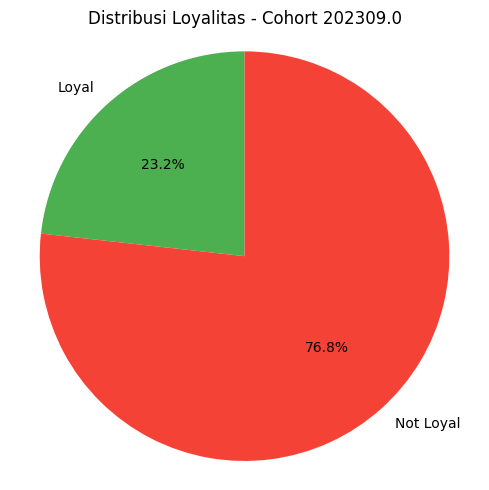

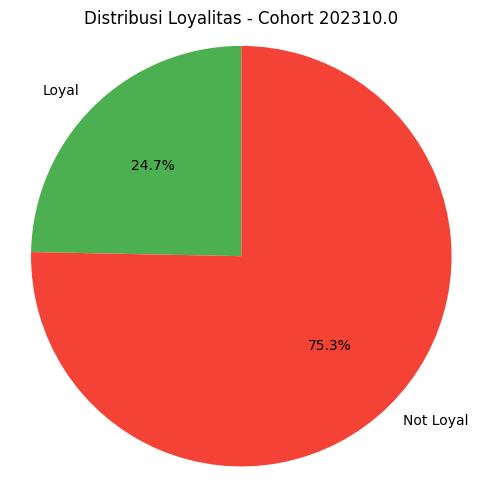

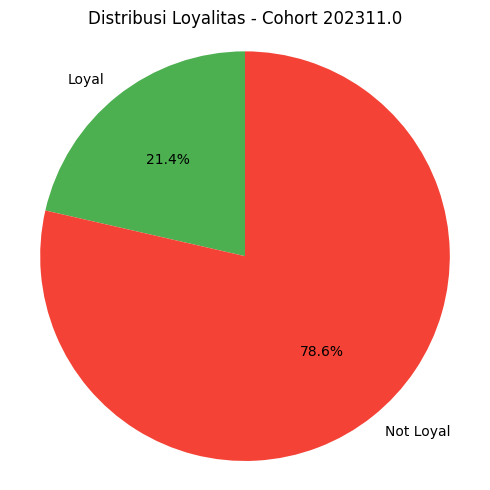

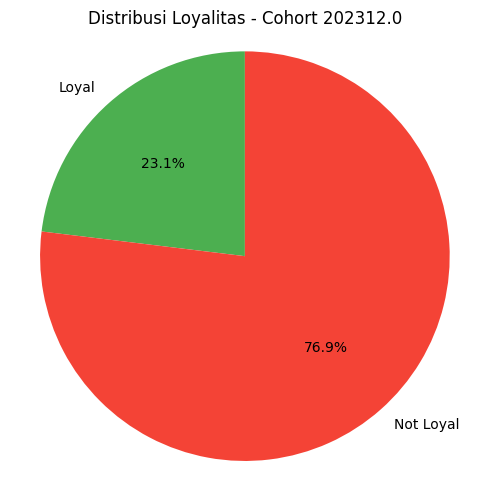

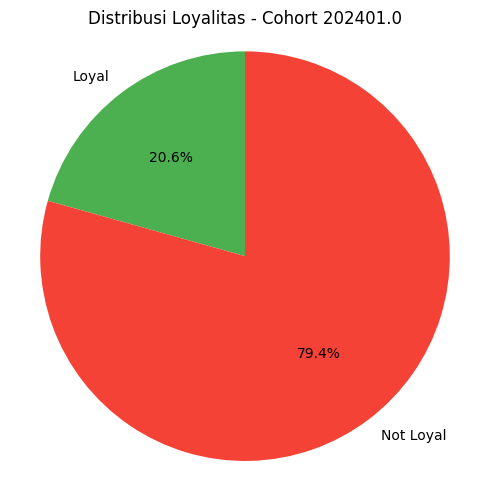

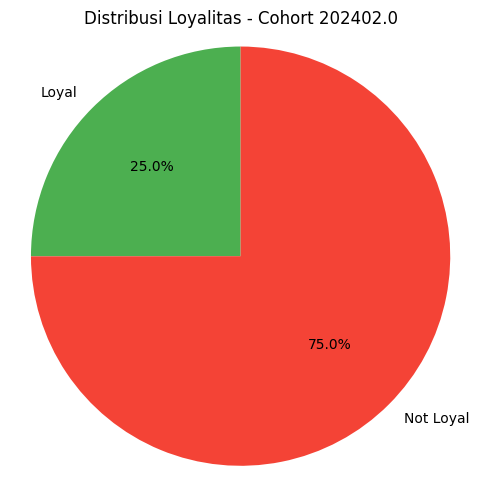

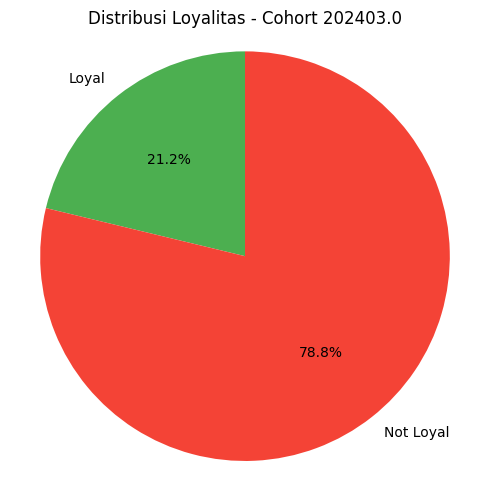

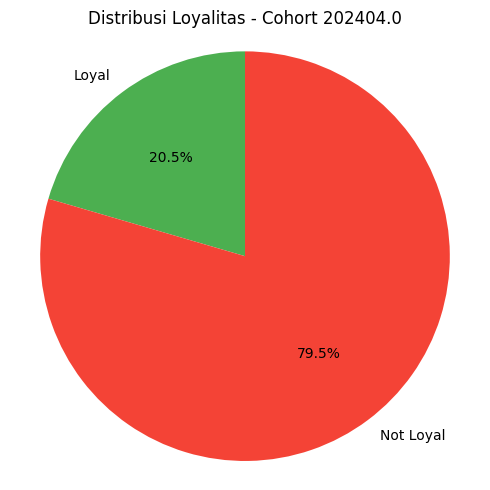

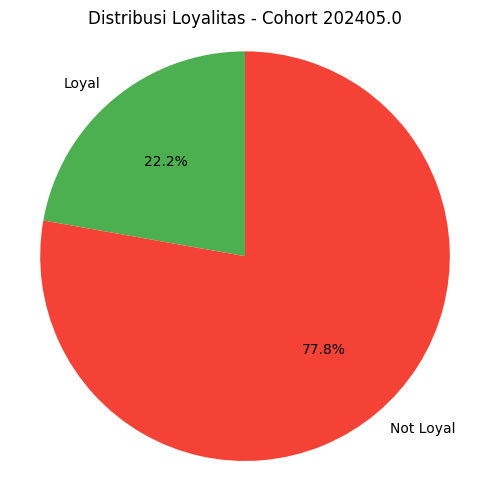

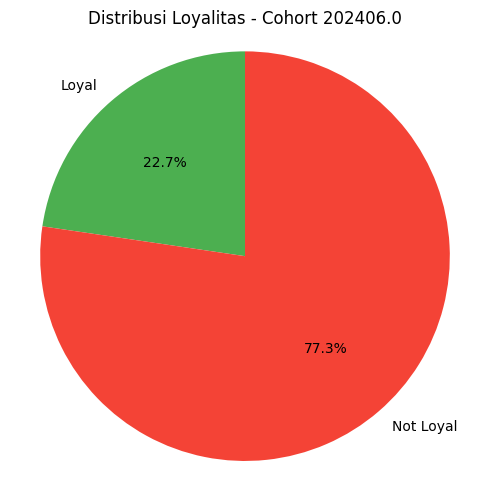

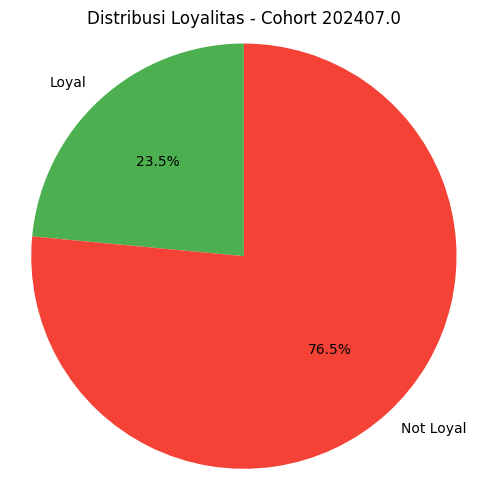

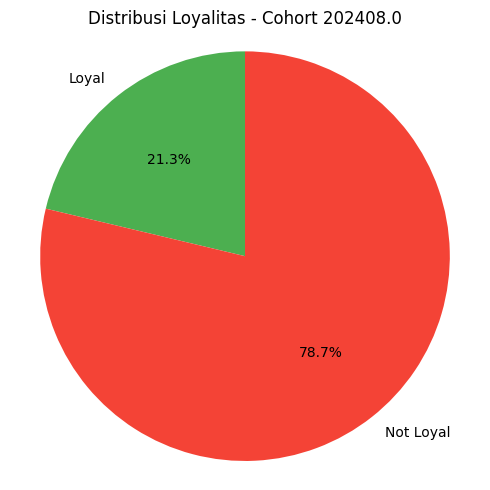

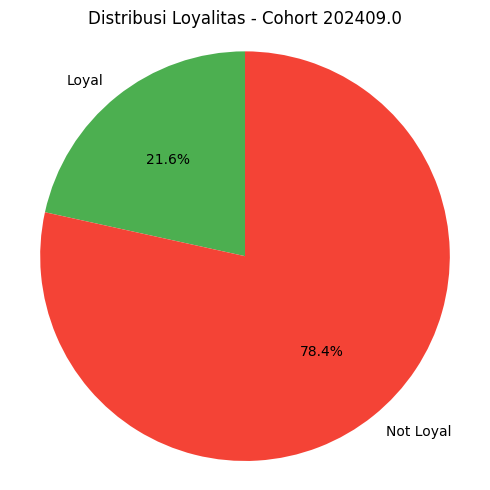

In [49]:
# Loop untuk setiap cohort
for index, row in cohort_loyalty_summary.iterrows():
    cohort = row['cohort']
    loyal_pct = row['% Loyal']
    not_loyal_pct = row['% Not Loyal']

    labels = ['Loyal', 'Not Loyal']
    sizes = [loyal_pct, not_loyal_pct]
    colors = ['#4CAF50', '#F44336']  # Hijau untuk loyal, merah untuk tidak loyal

    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
    plt.title(f'Distribusi Loyalitas - Cohort {cohort}')
    plt.axis('equal')  # Agar bentuknya bulat sempurna
    plt.tight_layout()
    plt.show()
